### Imports

In [6]:
import numpy as np
from numpy.fft import fft2, ifft2
from PIL import Image
import PIL.ImageOps
from matplotlib import pyplot as plt

### Functions

In [129]:
def get_array(filename, original=False, invert=True):
    image = Image.open(filename)
    
    if not original:
        image = image.convert("L")
        if invert:
            image = PIL.ImageOps.invert(image)

    return np.array(image)

def local_max(array, x, y):
    if x > 0:
        if array[x-1, y] > array[x, y]:
            return False
        if y > 0 and array[x-1, y-1] > array[x, y]:
            return False
        if y < array.shape[1] - 1 and array[x-1, y+1] > array[x, y]:
            return False
    
    if x < array.shape[0] - 1 :
        if array[x+1, y] > array[x, y]:
            return False
        if y > 0 and array[x+1, y-1] > array[x, y]:
            return False
        if y < array.shape[1] - 1 and array[x+1, y+1] > array[x, y]:
            return False
        
    if y > 0 and array[x, y-1] > array[x, y]:
        return False
    
    if y < array.shape[1] - 1 and array[x, y+1] > array[x,y]:
        return False
    
    return True


def get_occurrence(image, pattern, threshold):
    offset_x = pattern.shape[0] // 2
    offset_y = pattern.shape[1] // 2
    
    occurrence = np.real(ifft2(fft2(image) * fft2(np.rot90(pattern, 2), image.shape)))
    
    highlighted_points = []
    
    for i in range(occurrence.shape[0]):
        for j in range(occurrence.shape[1]):
            if occurrence[i, j] > threshold and local_max(occurrence, i, j):
                highlighted_points.append((j - offset_x, i - offset_y))

    return highlighted_points

def separate_coordinates(points):
    points_x = list(map(lambda point: point[0], points))
    points_y = list(map(lambda point: point[1], points))

    return points_x, points_y

def show_image(image, points):
    fig, ax = plt.subplots(1, 1, figsize=(15,10))

    ax.imshow(image, cmap='gray')
    
    points_x, points_y = separate_coordinates(points)
    ax.scatter(points_x, points_y, c="#FF0000", s=5)
    
    plt.show()

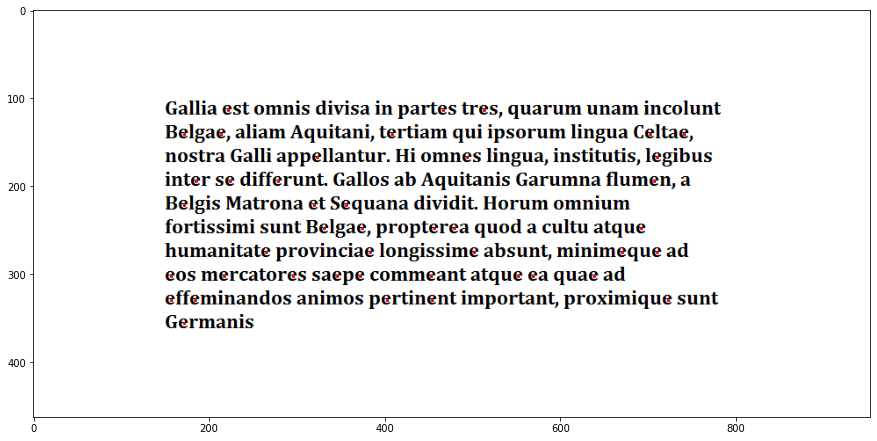

43


In [146]:
original_galia = get_array("image_analysis/galia.png", original=True)
galia = get_array("image_analysis/galia.png")
e = get_array("image_analysis/e.png")

points = get_occurrence(galia, e, threshold=3.5 * 10**6)

show_image(original_galia, points)
print(len(points))

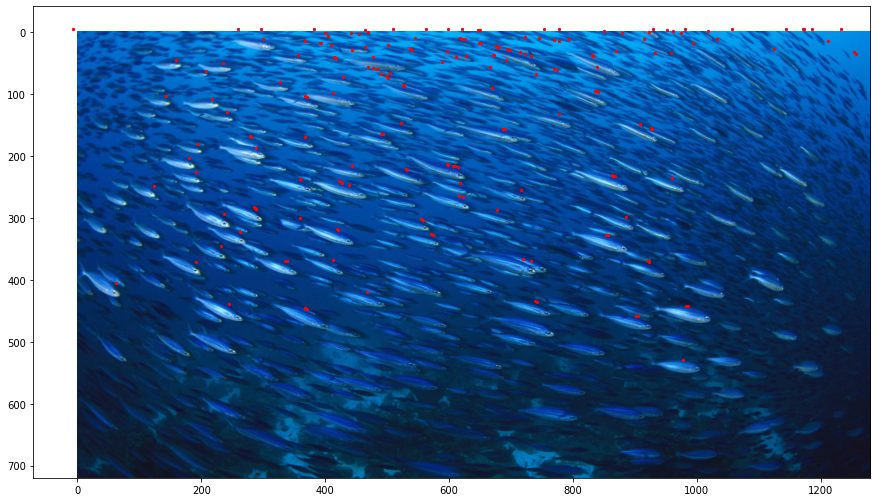

190


In [147]:
original_school = get_array("image_analysis/school.jpg", original=True)
school = get_array("image_analysis/school.jpg", invert=False)
fish = get_array("image_analysis/fish.png", invert=False)

points = get_occurrence(school, fish, threshold=6*10**6)

show_image(original_school, points)
print(len(points))